<a href="https://colab.research.google.com/github/taxuyou/library-recommend-and-timeseries-predict/blob/master/ARIMA%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [0]:
lib = pd.read_csv('대출과날씨데이터1.csv',index_col="date",parse_dates=True)

In [0]:
from datetime import datetime

In [25]:
lib.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10942 entries, 2017-01-01 09:00:00 to 2019-07-24 20:00:00
Data columns (total 4 columns):
c       10942 non-null float64
mm      10942 non-null float64
h       10942 non-null float64
loan    10942 non-null int64
dtypes: float64(3), int64(1)
memory usage: 427.4 KB


In [0]:
from statsmodels.tsa.stattools import adfuller
def adf_check(ts):
  result = adfuller(ts)
  if result[1] <= 0.05:
    print('Stationary {}'.format(result[1]))
  else:
    print('Non Stationary {}'.format(result[1]))

In [27]:
adf_check(lib['loan'])

Stationary 0.0


In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
p = list(range(0,5))
d = [1,2]
q = [0]

In [0]:
import itertools

In [0]:
pdq = list(itertools.product(p, d, q))

In [32]:
pdq

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 1, 0),
 (4, 2, 0)]

In [33]:
for param in pdq:
  model = ARIMA(lib['loan'], order = param)
  result = model.fit()
  print('ARIMA{} - AIC{}'.format(param, result.aic))

ARIMA(0, 1, 0) - AIC142485.74046923636
ARIMA(0, 2, 0) - AIC150897.02728261653
ARIMA(1, 1, 0) - AIC142417.78361315827


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 2, 0) - AIC147549.5197814409
ARIMA(2, 1, 0) - AIC142383.84723394128


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(2, 2, 0) - AIC146315.36158819456


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(3, 1, 0) - AIC142314.30213224766


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(3, 2, 0) - AIC145797.3279095245


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(4, 1, 0) - AIC142122.8444155144


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(4, 2, 0) - AIC145263.66067235422


In [0]:
###   p = 4, d = 2 , q =0

In [87]:
X = lib['loan'].values

10942

In [0]:
#298


In [0]:
size = int(len(X) * 0.97)

In [0]:
train, test = X[:size], X[size:]

In [107]:
len(train)

10613

In [108]:
len(test)

329

In [0]:
# 시점을 옮겨갈수록 뒤에서 데이터 한개씩 추가해줘야 되기떄문에 히스토리 하나 만들어줌
history = [x for x in train]

In [0]:
# 예측 결과값 넣을 곳
prediction = []

In [111]:
len(prediction)

0

In [0]:
#!pip install tqdm
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

In [113]:
# t 시점은 테스트 사이즈만큼 돌림. 돌려서 실제 결과랑 테스트 비교하기 위해
for t in tqdm(range(len(test)), desc = '진행상황'):
  #트레인데이터로 모델 만들기
  model = ARIMA(history, order = (4, 2, 0))
  result = model.fit(disp = 0)
  # 결과에 대해 예측하기
  output = result.forecast()
  #아웃풋은 첫번째 값이 예측값
  yhat = output[0]
  prediction.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, prediction)
print('Test MSE: %.3f' % error)

진행상황: 100%|██████████| 329/329 [22:38<00:00,  5.33s/it]


In [115]:
len(prediction)

329

In [172]:
error = mean_squared_error(test, prediction)
error

28094.778580611386

In [169]:
# 모델 정확성
import numpy as np
rmse = np.sqrt(error)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 167.615


In [121]:
lib['loan'].describe()

count    10942.000000
mean       232.713398
std        208.028655
min          1.000000
25%         82.000000
50%        192.000000
75%        323.000000
max       1268.000000
Name: loan, dtype: float64

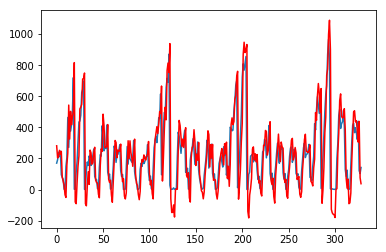

In [129]:
plt.plot(test)
plt.plot(prediction, color = 'red')

In [0]:
prediction = np.reshape(prediction, 329,1)

In [0]:
# 코사인 유사도 정확도구하기
from numpy import dot
from numpy.linalg import norm
cos_sim = dot(prediction, test)/(norm(prediction)*norm(test))

In [165]:
print('코사인 유사도 :', cos_sim*100)

코사인 유사도 : 86.4075162731864
